What makes a valuable player? There are numerous measures that scouts and teams use to assess if a potential player will be a valuable asset or a washout. Ultimately, a valuable player will be the top performer with respect to his position's required skills, but also need to be good at hitting, because in the game of baseball nearly everyone playing in the game needs to do some batting.(Pitchers have the option in one of the leagues to take a Designated Hitter).
Using my limited knowledge of baseball, as well as some common sense, I wanted to look at several measures of offense to analyze the players using Sean Lahman's dataset, specifically "batting". I've also compiled a list of 10 players who sources say are the best to have ever played the game, and I want to see if my top ten results in each category measure up.

1) What observations can we make about those who contributed to scoring?
Contribution to scoring can be rather simple. I judged a contributor to be a player who scores runs or bats other players in (inclusive).  So I will be looking at playerID, Runs and RBI's as a measure of scoring.

In [2]:
import pandas as pd #importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv that I'm using for offense
filename= 'batting.csv'
batting_df = pd.read_csv(filename)
#print out the first 3 rows to get header information
batting_df.head(n=3)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#group the df by playerID. Some players played on multiple teams over multiple years.
#I wanted the sum of data for each player over their career.
at_bat=batting_df.groupby('playerID')[['AB']].sum().reset_index()
at_bat.head()
#I'll be using the at_bat data later

,playerID,AB
0,aardsda01,4
1,aaronha01,12364
2,aaronto01,944
3,aasedo01,5
4,abadan01,21


In [4]:
#I need to make a separate dataframe that sums the runs and rbi's
scores_df=batting_df.groupby('playerID')[['R','RBI']].sum().reset_index()
scores_df.head()

,playerID,R,RBI
0,aardsda01,0,0.0
1,aaronha01,2174,2297.0
2,aaronto01,102,94.0
3,aasedo01,0,0.0
4,abadan01,1,0.0


At this point, I want to see the how the distribution of Runs and RBI's looks. I also want to look at some summary statistics to confirm what I suspect: that there are a lot of players who have Runs and RBI's equal to zero.

Populating the interactive namespace from numpy and matplotlib


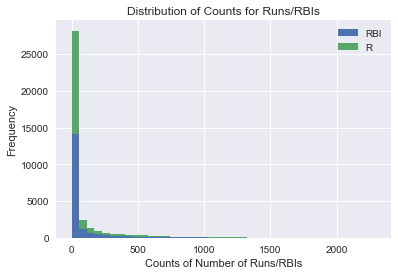

In [5]:
%pylab inline
plt.figure();
scores_df[['RBI','R']].plot.hist(bins=40,stacked = True)#making a histogram of RBIs and Runs
plt.xlabel('Counts of Number of Runs/RBIs')
plt.title('Distribution of Counts for Runs/RBIs')

So this distribution is strongly right skewed, and there's no surprise there. Players don't stay around if they don't have any or many hits, runs or RBI's. We have a high density of players who might have stayed around a year, got no statistics, and were replaced. Confirming this, we can look at a descriptive summary. We'd expect to see a low mean and a very large standard deviation: the presence of zeroes will bring the mean down, and there will be a few players with a very large number of runs/RBI's, making the spread of the distribution huge.

In [6]:
scores_df[['R','RBI']].describe()

,R,RBI
count,18915.000000,18784.000000
mean,102.275390,92.689044
std,238.578514,223.002211
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.000000,4.000000
75%,63.000000,55.000000
max,2295.000000,2297.000000


Because of the high standard deviation, and a mean that is very far from the max, I am going to eliminate those players who had zero of both runs and RBI's so I can have a data set of players who contributed to scoring.

In [7]:
#Filter out 0 Runs AND 0 RBIs [hits_df.Total !=0]
no_nonzero_runs_rbis = scores_df[scores_df.R & scores_df.RBI !=0]

scores = no_nonzero_runs_rbis.sum(axis=1)#take the sum of each row and translate to scores

#make a df with the columns so "scores" can be added as a col
AB_scoring = batting_df.groupby('playerID')[['AB','R','RBI']].sum().reset_index()
#eliminate the zero R and RBI so the df can be the same length as "scores"
AB_scoring = AB_scoring[AB_scoring.R & AB_scoring.RBI !=0]


In [8]:
AB_scoring['Scoring']=scores# put the scores on as a col
AB_scoring.head()

,playerID,AB,R,RBI,Scoring
7,abbated01,3044,355,324.0,679.0
8,abbeybe01,225,21,17.0,38.0
9,abbeych01,1751,307,280.0,587.0
15,abbotku01,2044,273,242.0,515.0
19,aberal01,100,5,6.0,11.0


In [9]:
#delete the R and RBI columns because they are no longer needed
del AB_scoring['R']
del AB_scoring['RBI']
AB_scoring.head()

,playerID,AB,Scoring
7,abbated01,3044,679.0
8,abbeybe01,225,38.0
9,abbeych01,1751,587.0
15,abbotku01,2044,515.0
19,aberal01,100,11.0


Using a boxplot for description of the distribution gives:

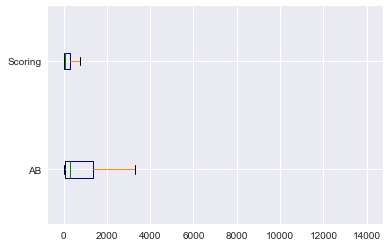

In [10]:
color = dict(boxes='DarkBlue',whiskers = 'DarkOrange', medians='Green',caps='Black')
AB_scoring.plot.box(vert = False, color = color)

The At Bat data is more varied and spread than the scoring. We'll look next at the relationship between scoring and At Bats.


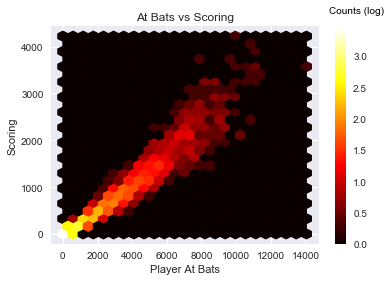

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
fig,ax=plt.subplots()

hb=AB_scoring.plot.hexbin(x='AB', y='Scoring', gridsize=24, bins = 'log',cmap= 'hot', ax=ax)

hb.set_xlabel("Player At Bats")
hb.set_title("At Bats vs Scoring")
#annotating the colorbar area with a title
#code from Myles@Udacity forums
plt.annotate('Counts (log)', xy=(1, 1), xytext=(10, 20), va='top',  xycoords='axes fraction', textcoords='offset points',color='black')
#hexbinning with bins = log

#"Count, 10^x"

The bins are similar to a frequency histogram in that, the color represents the number of observations in that grouping. Since the bins are set to 'log'(aka common log), a lighter color represents a greater number of observations. For instance, light yellow is 3 in the colorbar legend, which represents 1000 observations. Red/orange represents around 10 (1 on the colorbar).  As we know from the descriptive statistics, there are quite a few low number of scores for low number of At Bats. As the number of At Bats increases, generally so does the number of Scores, however it is less frequent.  There also appears to be a lot of variation in the number of scores as the At Bats are increased. The relationship appears to follow an exponential trend line, but I'm more interested in looking at the relationship rather than the strength of the relationship. The best players would have a relatively low number of At Bats to high amount of scores, and we can see that is the case for some players as represented by the upper portion of the colored bins, though not many players achieve that. This visualization is not meant to imply that more At Bats causes there to be more scores; but we can make inferences from the general trend between zero and the max number of At Bats.

There is one more measure to look at, and that is the top ten scorers of all time, just to see how my measure of offense contribution stacks up to the baseball experts. According to ESPN's Hall of 100(http://www.espn.com/mlb/feature/video/_/id/8652210/espn-hall-100-ranking-all-greatest-mlb-players):
10: Honus Wagner
9:Mickey Mantle
8: Stan Musial
7: Roger Clemens
6: Ty Cobb
5: Hank Aaron
4: Ted Williams
3: Barry Bonds
2: Willie Mays
1: Babe Ruth

In [12]:
#using the function Caroline taught us in the lessons, but modified slightly
def column_sort(column):
    sorted_column = column.sort_values(ascending=False)#descending order: highest to lowest
    return sorted_column.iloc[0:10]#make a slice of the top ten

In [13]:
top_ten_scorers=AB_scoring[['Scoring']].apply(column_sort)#finding the top ten scorers
top_ten_scorers

,Scoring
1542,4223.0
14528,4107.0
12205,3900.0
12876,3719.0
5600,3673.0
14484,3641.0
12183,3544.0
18479,3502.0
12970,3498.0
14719,3479.0


In [14]:
best_scorers=top_ten_scorers.merge(AB_scoring, on ='Scoring',how = 'left')#merge with AB_scoring to get names
best_scorers

,Scoring,playerID,AB
0,4223.0,bondsba01,9847
1,4107.0,rodrial01,10566
2,3900.0,musiast01,10972
3,3719.0,ottme01,9456
4,3673.0,foxxji01,8134
5,3641.0,robinfr02,10006
6,3544.0,murraed02,11336
7,3502.0,winfida01,11003
8,3498.0,palmera01,10472
9,3479.0,rosepe01,14053


Some interesting things to note: Many of my top ten scorers are not in ESPN's which implies there are is a lot more to being the best than scores alone. Also, foxxji01, ottme01, and bondsba01 have a fairly low number of At Bats, while having a relatively larger number of scores. Foxxji01 has the lowest number of At Bats, while his Scoring is in the 3rd quartile. And bondsba01 has the max Scoring, while residing in the 1st quartile for At Bats.

In [15]:
best_scorers[['Scoring','AB']].describe()

,Scoring,AB
count,10.00000,10.000000
mean,3728.60000,10584.500000
std,264.31345,1530.815777
min,3479.00000,8134.000000
25%,3512.50000,9886.750000
50%,3657.00000,10519.000000
75%,3854.75000,10995.250000
max,4223.00000,14053.000000


This is an unexpected result of the analysis. I simply wanted to find who the best scorers are, but as I look at the number of At Bats each individual has, and who batted the least but had the higher scores, I want to find a ratio that would inform me who has the highest scoring percentage. In other words, which player would be most likely to produce a run or RBI if in a clutch moment?

In [16]:
scoring_percentage=best_scorers['Scoring'].div(best_scorers['AB'],axis='index')
#finding the scoring percentage

In [17]:
best_scorers['Scoring Percentage']=scoring_percentage#adding the Scoring Percentage column
best_scorers[['playerID','Scoring','AB','Scoring Percentage']]#making the df look readable

,playerID,Scoring,AB,Scoring Percentage
0,bondsba01,4223.0,9847,0.428862
1,rodrial01,4107.0,10566,0.388700
2,musiast01,3900.0,10972,0.355450
3,ottme01,3719.0,9456,0.393295
4,foxxji01,3673.0,8134,0.451561
5,robinfr02,3641.0,10006,0.363882
6,murraed02,3544.0,11336,0.312632
7,winfida01,3502.0,11003,0.318277
8,palmera01,3498.0,10472,0.334034
9,rosepe01,3479.0,14053,0.247563


As I suspected, foxxji01(Jimmie Foxx) has the highest scoring percentage, with Bonds following after.

2) What role does the raw number of hits play in determining the great baseball players?
We can look at both the raw number of hits and the top ten individuals who had the most. We can then look at how it relates to ESPN's top player list. I think it would be interesting to also compare the number, again to the total At Bats, so we can see who had the highest frequency per bat. According to one take-away from the movie "Moneyball", getting on base is a valuable commodity in baseball. Whether it is by talent(hits) or reputation(walks or BB), getting on base puts a player in a better scoring position.

In [18]:
#batting_df is already loaded into python, but we'll take a look at it again
batting_df.head(n=2)


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
hits_df = batting_df.groupby('playerID')[['H','2B','3B','HR','BB']].sum().reset_index()
hits_df.head()

,playerID,H,2B,3B,HR,BB
0,aardsda01,0,0,0,0,0
1,aaronha01,3771,624,98,755,1402
2,aaronto01,216,42,6,13,86
3,aasedo01,0,0,0,0,0
4,abadan01,2,0,0,0,4


Hits (H) is inclusive of singles(not shown), doubles(2B) and triples(3B). My measure is going to be how many bases the player took. In other words, a double is worth 2 bases, a triple is 3 bases and so on. I need to find how many singles the player had, so I will take the sum of the 2B, 3B, and HR and subtract from the total H. Then I will find the total number of bases.

In [20]:
not_singles=batting_df.groupby('playerID')[['2B','3B','HR']].sum()
#making a new df with doubles, triples, and HR

In [21]:
not_singles.reset_index().head()

,playerID,2B,3B,HR
0,aardsda01,0,0,0
1,aaronha01,624,98,755
2,aaronto01,42,6,13
3,aasedo01,0,0,0
4,abadan01,0,0,0


In [22]:
total=not_singles.sum(axis=1)#sum the rows by player to get the total 2B,3B,HR
total.head()

playerID
aardsda01       0
aaronha01    1477
aaronto01      61
aasedo01        0
abadan01        0
dtype: int64

In [23]:
not_singles['total']=total#add the column to the not_singles df
not_singles.head()

,2B,3B,HR,total
playerID,,,,
aardsda01,0,0,0,0
aaronha01,624,98,755,1477
aaronto01,42,6,13,61
aasedo01,0,0,0,0
abadan01,0,0,0,0


In [24]:
not_singles=not_singles.reset_index()

In [25]:
hits_df['Singles']=hits_df.H - not_singles.total#subtract the total column from the hits column

In [26]:
hits_df.head()

,playerID,H,2B,3B,HR,BB,Singles
0,aardsda01,0,0,0,0,0,0
1,aaronha01,3771,624,98,755,1402,2294
2,aaronto01,216,42,6,13,86,155
3,aasedo01,0,0,0,0,0,0
4,abadan01,2,0,0,0,4,2


In [27]:
del hits_df['H']#delete the hits column, it's just extra

In [28]:
hits_df.head()

,playerID,2B,3B,HR,BB,Singles
0,aardsda01,0,0,0,0,0
1,aaronha01,624,98,755,1402,2294
2,aaronto01,42,6,13,86,155
3,aasedo01,0,0,0,0,0
4,abadan01,0,0,0,4,2


In [29]:
'''define three functions that I will apply to the hits_df df to turn the 
number 2B,3B, and HR into bases
'''
def triples_into_hits(triples):
    return triples*3
def doubles_into_hits(doubles):
    return doubles*2
def hr_into_hits(hrs):
    return hrs*4

In [30]:
hits_df['2xHits']=hits_df[['2B']].apply(doubles_into_hits)
hits_df['3xHits']=hits_df[['3B']].apply(triples_into_hits)
hits_df['4xHits']=hits_df[['HR']].apply(hr_into_hits)

In [31]:
hits_df.head()

,playerID,2B,3B,HR,BB,Singles,2xHits,3xHits,4xHits
0,aardsda01,0,0,0,0,0,0,0,0
1,aaronha01,624,98,755,1402,2294,1248,294,3020
2,aaronto01,42,6,13,86,155,84,18,52
3,aasedo01,0,0,0,0,0,0,0,0
4,abadan01,0,0,0,4,2,0,0,0


In [32]:
del hits_df['2B']
del hits_df['3B']
del hits_df['HR']#delete the unnecessary cols

In [33]:
hits_df.head()

,playerID,BB,Singles,2xHits,3xHits,4xHits
0,aardsda01,0,0,0,0,0
1,aaronha01,1402,2294,1248,294,3020
2,aaronto01,86,155,84,18,52
3,aasedo01,0,0,0,0,0
4,abadan01,4,2,0,0,0


In [34]:
'''Next, we find the total number of bases a player acquired'''
sum_on_base = hits_df.sum(axis=1)
hits_df['TotalBases']=sum_on_base

In [35]:
hits_df.reset_index().head(n=2)

,index,playerID,BB,Singles,2xHits,3xHits,4xHits,TotalBases
0,0,aardsda01,0,0,0,0,0,0
1,1,aaronha01,1402,2294,1248,294,3020,8258


As in the last analysis, I have a strong suspicion that the data will be right skewed, because of the number of players with zero total bases, but let's look at the summary:

In [36]:
hits_df['TotalBases'].describe()

count    18915.000000
mean       367.037113
std        851.991220
min          0.000000
25%          1.000000
50%         20.000000
75%        224.000000
max       8534.000000
Name: TotalBases, dtype: float64

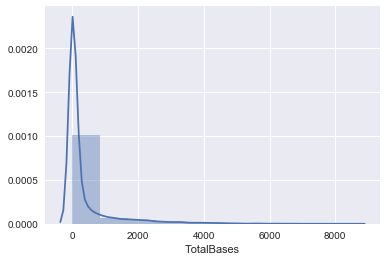

In [37]:
%matplotlib inline
sns.distplot(hits_df.TotalBases, bins = 10)

Again, we'll remove player if their number of total bases is 0. This will remove a number of players, but most likely won't change the shape since there still seem to be a lot in the 0 to 1000 range. 

In [38]:
all_nonzero_hits_df = hits_df[hits_df.TotalBases !=0]

In [39]:
all_nonzero_hits_df['TotalBases'].describe()

count    14933.000000
mean       464.910400
std        934.858585
min          1.000000
25%          8.000000
50%         55.000000
75%        402.000000
max       8534.000000
Name: TotalBases, dtype: float64

Quite a few data points were removed, but not enough to make the distribution look much different:


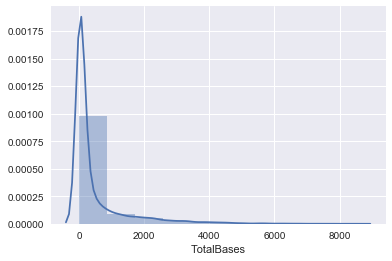

In [43]:
%matplotlib inline
sns.distplot(all_nonzero_hits_df.TotalBases, bins = 10)

Now we're ready to look at the relationship between At Bats and Total Bases. Merging two dataframes gives us:

In [44]:
all_nonzero_hits_with_at_bats=all_nonzero_hits_df.merge(at_bat, on = 'playerID', how = 'inner')

In [45]:
all_nonzero_hits_with_at_bats.head()

,playerID,BB,Singles,2xHits,3xHits,4xHits,TotalBases,AB
0,aaronha01,1402,2294,1248,294,3020,8258,12364
1,aaronto01,86,155,84,18,52,395,944
2,abadan01,4,2,0,0,0,6,21
3,abadfe01,0,1,0,0,0,1,9
4,abadijo01,0,11,0,0,0,11,49


In [46]:
anhwab = all_nonzero_hits_with_at_bats[['TotalBases','AB']]
anhwab.head()

,TotalBases,AB
0,8258,12364
1,395,944
2,6,21
3,1,9
4,11,49


Populating the interactive namespace from numpy and matplotlib


,TotalBases,AB
TotalBases,1.000000,0.982975
AB,0.982975,1.000000


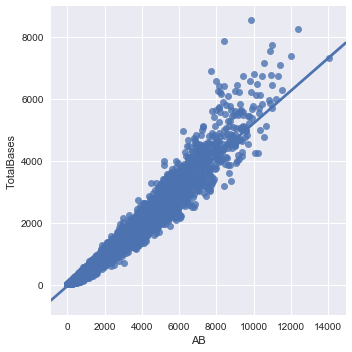

In [47]:
%pylab inline
sns.lmplot('AB','TotalBases', data = anhwab, fit_reg = True)
anhwab.corr(method = 'pearson', min_periods = 1)#calculating the correlation

The trend seems fairly linear here but, as expected by common sense, the data points get more diffuse(further away from the trend line), as there are more at bats. For the players who have the higher number of at bats, it is also interesting to note that some exceed the expectations and get much more bases out of their at bats. But remember, this is total bases, so the players who are "power sluggers" will have a lot more bases because of the calculation, and possibly because they get walked a lot because of their reputation. This is in no ways a definitive result, and I wouldn't use this scatterplot to make a prediction nor would I imply number of at bats causes there to be more base acquisition.

In [48]:
top_ten=column_sort(all_nonzero_hits_df['TotalBases'])
top_ten

1542     8534
1        8258
14865    7855
12205    7733
10857    7530
18728    7384
14719    7318
14528    7151
3155     7103
18370    6905
Name: TotalBases, dtype: int64

In [49]:
top_ten_df=pd.DataFrame(top_ten)#makethis into a dataframe so I can merge with no_nonzero_hits_df
top_ten_df

,TotalBases
1542,8534
1,8258
14865,7855
12205,7733
10857,7530
18728,7384
14719,7318
14528,7151
3155,7103
18370,6905


In [53]:
final_df=top_ten_df.merge(all_nonzero_hits_df, on = ['TotalBases'], how = 'inner')
final_df

,TotalBases,playerID,BB,Singles,2xHits,3xHits,4xHits
0,8534,bondsba01,2558,1495,1202,231,3048
1,8258,aaronha01,1402,2294,1248,294,3020
2,7855,ruthba01,2062,1517,1012,408,2856
3,7733,musiast01,1599,2253,1450,531,1900
4,7530,mayswi01,1464,1960,1046,420,2640
5,7384,yastrca01,1845,2262,1292,177,1808
6,7318,rosepe01,1566,3215,1492,405,640
7,7151,rodrial01,1338,1840,1096,93,2784
8,7103,cobbty01,1249,3053,1448,885,468
9,6905,willite01,2021,1537,1050,213,2084


In [54]:
# a little more re-organizing:
final_df=final_df[['playerID','BB','Singles','2xHits','3xHits','4xHits','TotalBases']]
final_df

,playerID,BB,Singles,2xHits,3xHits,4xHits,TotalBases
0,bondsba01,2558,1495,1202,231,3048,8534
1,aaronha01,1402,2294,1248,294,3020,8258
2,ruthba01,2062,1517,1012,408,2856,7855
3,musiast01,1599,2253,1450,531,1900,7733
4,mayswi01,1464,1960,1046,420,2640,7530
5,yastrca01,1845,2262,1292,177,1808,7384
6,rosepe01,1566,3215,1492,405,640,7318
7,rodrial01,1338,1840,1096,93,2784,7151
8,cobbty01,1249,3053,1448,885,468,7103
9,willite01,2021,1537,1050,213,2084,6905


In [55]:
bases_vs_AB =final_df.merge(at_bat, on= 'playerID', how = 'inner')#merging with At Bat to conduct further analysis

In [56]:
bases_vs_AB

,playerID,BB,Singles,2xHits,3xHits,4xHits,TotalBases,AB
0,bondsba01,2558,1495,1202,231,3048,8534,9847
1,aaronha01,1402,2294,1248,294,3020,8258,12364
2,ruthba01,2062,1517,1012,408,2856,7855,8398
3,musiast01,1599,2253,1450,531,1900,7733,10972
4,mayswi01,1464,1960,1046,420,2640,7530,10881
5,yastrca01,1845,2262,1292,177,1808,7384,11988
6,rosepe01,1566,3215,1492,405,640,7318,14053
7,rodrial01,1338,1840,1096,93,2784,7151,10566
8,cobbty01,1249,3053,1448,885,468,7103,11434
9,willite01,2021,1537,1050,213,2084,6905,7706


I'm again interested in a ratio, or a percent. The percent I'd like to be able to see is number of bases per at bat. In other words, we could find an expected base percentage for each player in the top ten.

In [57]:
on_base_ratio= bases_vs_AB['TotalBases'].div(bases_vs_AB['AB'],axis='index')
#calculating the ratio = TotalBases divided by At Bats
bases_vs_AB['BasesPerBat']=on_base_ratio
bases_vs_AB

,playerID,BB,Singles,2xHits,3xHits,4xHits,TotalBases,AB,BasesPerBat
0,bondsba01,2558,1495,1202,231,3048,8534,9847,0.866660
1,aaronha01,1402,2294,1248,294,3020,8258,12364,0.667907
2,ruthba01,2062,1517,1012,408,2856,7855,8398,0.935342
3,musiast01,1599,2253,1450,531,1900,7733,10972,0.704794
4,mayswi01,1464,1960,1046,420,2640,7530,10881,0.692032
5,yastrca01,1845,2262,1292,177,1808,7384,11988,0.615949
6,rosepe01,1566,3215,1492,405,640,7318,14053,0.520743
7,rodrial01,1338,1840,1096,93,2784,7151,10566,0.676793
8,cobbty01,1249,3053,1448,885,468,7103,11434,0.621217
9,willite01,2021,1537,1050,213,2084,6905,7706,0.896055


Even though Barry Bonds has more total bases, he was at bat more than Babe Ruth or Ted Williams, so I see a different ordering to my top ten than the Scoring data. 

3) What is the utility in being a good hitter?
Baseball is a team game. Baseball is also a highly individual game. When at bat, a player has to depend on his skill to succeed or fail.  I want to look at what utility a power hitter may contribute to the team's objective. Some players may have a high number of hits, or bases, but what effect does that have on the team's score? To answer this question, I'm going to look at power hitting-- which is measured as the number of doubles, triples, and home runs--and its relationship to RBIs. In other words, I'm looking at the utility of being able to hit long balls and how it contributes to the team's score.

In [58]:
'''I can use the not_singles df from the the prior analysis and attach the 
RBIs from the first analysis'''
not_singles.reset_index().head()

,index,playerID,2B,3B,HR,total
0,0,aardsda01,0,0,0,0
1,1,aaronha01,624,98,755,1477
2,2,aaronto01,42,6,13,61
3,3,aasedo01,0,0,0,0
4,4,abadan01,0,0,0,0


In [59]:
rbi_only=batting_df.groupby('playerID')[['RBI']].sum()

In [60]:
rbi_only.reset_index().head()

,playerID,RBI
0,aardsda01,0.0
1,aaronha01,2297.0
2,aaronto01,94.0
3,aasedo01,0.0
4,abadan01,0.0


In [63]:
not_singles['RBI']=rbi_only

In [64]:
power_utility=not_singles[not_singles.total !=0]
power_utility.reset_index().head()

,index,playerID,2B,3B,HR,total,RBI
0,1,aaronha01,624,98,755,1477,NaN
1,2,aaronto01,42,6,13,61,NaN
2,7,abbated01,99,43,11,153,NaN
3,8,abbeybe01,3,3,0,6,NaN
4,9,abbeych01,67,46,19,132,NaN


Populating the interactive namespace from numpy and matplotlib


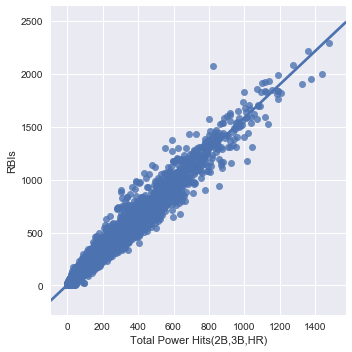

In [206]:
%pylab inline
sns.lmplot('total','RBI', data = power_utility, fit_reg = True).set_axis_labels("Total Power Hits(2B,3B,HR)","RBIs")

In [248]:
#del power_utility['2B']
#del power_utility['3B']
#del power_utility['HR']
'''I will calculate the correlation'''
power_utility.head().reset_index()

,playerID,total,RBI
0,aaronha01,1477,2297.0
1,aaronto01,61,94.0
2,abbated01,153,324.0
3,abbeybe01,6,17.0
4,abbeych01,132,280.0


In [256]:
power_utility.corr(method='pearson',min_periods = 1)#find pearson's r

,total,RBI
total,1.00000,0.98692
RBI,0.98692,1.00000


There is a strong correlation (r = .98692) between total power hits made by the batter and number of RBIs.  The results imply that being able to take a larger number of bases by hitting doubles, triples, and home runs is strongly correlated with batting other players in.

Now, I want to find a meaningful way to represent the top ten players, but how could that be accomplished? If I find the ratio of the total power hits to RBI's, I will in some cases get "undefined" for those players who had a certain number of power hits, and zero RBI's. I also do not want to rank by ratio, because there are possibly some players who might have a 1 grand slam home run, and therefore have a ratio of 3. So I want to rank the top hitters to see who of those hitters had the highest ratio.

In [304]:
top_ten_utility= column_sort(power_utility['total'])

top_ten_utility = pd.DataFrame(top_ten_utility)#make into a df so it can be merged
top_ten_utility=top_ten_utility.reset_index()


In [305]:
rbis_only=batting_df.groupby('playerID')[['RBI']].sum()#make a df with only rbis
rbis_only=rbis_only.reset_index()

In [306]:
top_ten_utility=top_ten_utility.merge(rbis_only, on = 'playerID', how = 'inner')
#merge the two tables
top_ten_utility

,playerID,total,RBI
0,aaronha01,1477,2297.0
1,bondsba01,1440,1996.0
2,musiast01,1377,1951.0
3,ruthba01,1356,2217.0
4,mayswi01,1323,1903.0
5,rodrial01,1275,2086.0
6,pujolal01,1209,1817.0
7,ortizda01,1192,1768.0
8,griffke02,1192,1836.0
9,palmera01,1192,1835.0


In [314]:
rbis_to_total = top_ten_utility['RBI'].div(top_ten_utility['total'])#finding the ratio

In [315]:
top_ten_utility['P:RBI']=rbis_to_total#adding the column

In [316]:
top_ten_utility

,playerID,total,RBI,P:RBI
0,aaronha01,1477,2297.0,1.555179
1,bondsba01,1440,1996.0,1.386111
2,musiast01,1377,1951.0,1.416848
3,ruthba01,1356,2217.0,1.634956
4,mayswi01,1323,1903.0,1.438398
5,rodrial01,1275,2086.0,1.636078
6,pujolal01,1209,1817.0,1.502895
7,ortizda01,1192,1768.0,1.483221
8,griffke02,1192,1836.0,1.540268
9,palmera01,1192,1835.0,1.539430


The utility rank of the player is now more visible, with Alex Rodriguez coming in first, followed by Babe Ruth and so on.

Summary:
In this analysis, I looked at three measures of player ability:
    1)Scoring- Runs plus RBIs
    2)Bases Taken- singles and BBs count as 1, doubles as 2, triples as 3 and home runs as 4
    3)Utility of Power- using power hits (doubles, triples and home runs) 
Scoring is correlated with At Bats, as is Bases Taken. Utility is correlated with RBIs. Each measure is simplified to a ratio (or percent) for ease of viewing. The players were then sorted for each measure and I looked at the top ten to see how well my analysis of players matches up with ESPN's Hall of 100's top ten.  In all, I see some consistency in my measure in that 5 players in ESPN's Hall of 100 (top ten) appear in my analyses always in differing order. I can't make any conclusions as to how experts consider some players better than others, but at least I have seen some methods in this report that contribute to the overall ranking of players.

In [ ]:
'''Special note of thanks to my Dad, Larry Andrzejewski for helping me understand the baseball
statistics and what could be possible to measure in my analysis.'''

Sources:
Stack Overflow (stackoverflow.com) for pandas and numpy help and syntax
ESPN Hall of 100: link embedded in ipynb
matplotlib.org-- help with visualizations
Udacity-Forums: Help from Myles https://discussions.udacity.com/t/how-to-label-the-colorbar-in-pyplot/236234